In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st

In [2]:
def reduce_mem_usage(df):
    """
    iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    @param df:
    @return:
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
            df[col] = df[col].astype('str')

    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
path = '../input/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [4]:
train.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                 'indoorHum', 'indoorAtmo', 'temperature']
test.columns = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp', 'outdoorHum', 'outdoorAtmo',
                'indoorHum', 'indoorAtmo']

In [5]:
train.shape, test.shape

((25497, 13), (406, 12))

In [6]:
train = train[train['temperature'].notnull()]

In [7]:
train['year'].unique(), test['year'].unique()

(array([2019], dtype=int64), array([2019], dtype=int64))

In [8]:
train['month'].unique(), test['month'].unique()

(array([3, 4], dtype=int64), array([4], dtype=int64))

In [9]:
train['day'].unique(), test['day'].unique()

(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31,  1,  2,  3], dtype=int64),
 array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64))

In [10]:
train.groupby('time').size()

time
1552496443    1
1552496503    1
1552496565    1
1552496624    1
1552496682    1
             ..
1554224151    1
1554224212    1
1554224272    1
1554224332    1
1554224391    1
Length: 24807, dtype: int64

In [11]:
train.head().append(train.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo,temperature
0,1552496443,2019,3,14,1,0,43,14.6,85.0,993.1,80.0,992.4,15.4
1,1552496503,2019,3,14,1,1,43,14.7,84.0,993.0,80.0,992.6,15.4
2,1552496565,2019,3,14,1,2,45,14.7,84.0,992.7,80.0,992.8,15.4
3,1552496624,2019,3,14,1,3,44,14.6,85.0,993.2,80.0,992.6,15.4
4,1552496682,2019,3,14,1,4,42,14.6,85.0,992.7,80.0,992.6,15.3
25492,1554224151,2019,4,3,0,55,51,17.3,78.0,983.8,75.0,982.2,17.4
25493,1554224212,2019,4,3,0,56,52,17.3,77.0,983.4,75.0,982.5,17.4
25494,1554224272,2019,4,3,0,57,52,17.3,77.0,983.1,75.0,982.2,17.4
25495,1554224332,2019,4,3,0,58,52,17.3,77.0,983.3,75.0,982.5,17.4
25496,1554224391,2019,4,3,0,59,51,17.2,77.0,982.9,75.0,982.4,17.4


In [12]:
test.head().append(test.tail())

,time,year,month,day,hour,min,sec,outdoorTemp,outdoorHum,outdoorAtmo,indoorHum,indoorAtmo
0,1554224413,2019,4,3,1,0,13,15.3,91.0,988.0,88.0,988.3
1,1554226217,2019,4,3,1,30,17,15.4,91.0,987.8,88.0,988.0
2,1554228020,2019,4,3,2,0,20,15.3,92.0,988.0,89.0,988.3
3,1554229823,2019,4,3,2,30,23,15.2,92.0,988.1,89.0,988.7
4,1554231625,2019,4,3,3,0,25,15.5,91.0,987.9,88.0,987.9
401,1555081072,2019,4,12,22,57,52,21.9,66.0,980.8,66.0,978.6
402,1555082935,2019,4,12,23,28,55,21.6,66.0,981.7,65.0,979.6
403,1555084737,2019,4,12,23,58,57,22.1,65.0,979.8,65.0,980.5
404,1555086487,2019,4,13,0,28,7,26.7,44.0,975.9,48.0,976.8
405,1555088229,2019,4,13,0,57,9,27.1,43.0,975.7,47.0,976.8


In [13]:
train.shape, test.shape

((24807, 13), (406, 12))

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
time,24807.0,1.553341e+09,502913.611387,1.552496e+09,1.552913e+09,1.553333e+09,1.553775e+09,1.554224e+09
year,24807.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,24807.0,3.097069e+00,0.296058,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
day,24807.0,2.028431e+01,7.939102,1.000000e+00,1.600000e+01,2.200000e+01,2.600000e+01,3.100000e+01
hour,24807.0,1.209566e+01,6.894425,0.000000e+00,6.000000e+00,1.300000e+01,1.800000e+01,2.300000e+01
min,24807.0,2.955561e+01,17.290063,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
sec,24807.0,2.967437e+01,17.216476,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01
outdoorTemp,24389.0,1.656181e+01,4.256010,8.900000e+00,1.340000e+01,1.600000e+01,1.870000e+01,3.260000e+01
outdoorHum,24389.0,7.427020e+01,16.384355,2.300000e+01,6.300000e+01,7.800000e+01,8.800000e+01,9.600000e+01
outdoorAtmo,24389.0,9.836164e+02,22.843298,4.002000e+02,9.799000e+02,9.861000e+02,9.904000e+02,1.082500e+03


In [15]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
time,406.0,1.554651e+09,258348.177433,1.554224e+09,1.554414e+09,1.554649e+09,1.554891e+09,1.555088e+09
year,406.0,2.019000e+03,0.000000,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
month,406.0,4.000000e+00,0.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
day,406.0,7.463054e+00,2.972693,3.000000e+00,5.000000e+00,7.000000e+00,1.000000e+01,1.300000e+01
hour,406.0,1.206650e+01,7.002857,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
min,406.0,2.671429e+01,17.802542,0.000000e+00,1.000000e+01,3.000000e+01,4.075000e+01,5.900000e+01
sec,406.0,2.896305e+01,17.125711,0.000000e+00,1.400000e+01,2.800000e+01,4.400000e+01,5.900000e+01
outdoorTemp,404.0,2.137450e+01,5.557689,1.310000e+01,1.660000e+01,2.060000e+01,2.510000e+01,3.670000e+01
outdoorHum,404.0,6.640842e+01,18.728941,2.500000e+01,5.200000e+01,6.600000e+01,8.300000e+01,9.500000e+01
outdoorAtmo,404.0,9.781233e+02,12.948420,9.011000e+02,9.742500e+02,9.787000e+02,9.868000e+02,1.062600e+03


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24807 entries, 0 to 25496
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         24807 non-null  int64  
 1   year         24807 non-null  int64  
 2   month        24807 non-null  int64  
 3   day          24807 non-null  int64  
 4   hour         24807 non-null  int64  
 5   min          24807 non-null  int64  
 6   sec          24807 non-null  int64  
 7   outdoorTemp  24389 non-null  float64
 8   outdoorHum   24389 non-null  float64
 9   outdoorAtmo  24389 non-null  float64
 10  indoorHum    24807 non-null  float64
 11  indoorAtmo   24807 non-null  float64
 12  temperature  24807 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.6 MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         406 non-null    int64  
 1   year         406 non-null    int64  
 2   month        406 non-null    int64  
 3   day          406 non-null    int64  
 4   hour         406 non-null    int64  
 5   min          406 non-null    int64  
 6   sec          406 non-null    int64  
 7   outdoorTemp  404 non-null    float64
 8   outdoorHum   404 non-null    float64
 9   outdoorAtmo  404 non-null    float64
 10  indoorHum    405 non-null    float64
 11  indoorAtmo   405 non-null    float64
dtypes: float64(5), int64(7)
memory usage: 38.2 KB


In [18]:
train.isnull().sum().sort_values(ascending=False)

outdoorAtmo    418
outdoorHum     418
outdoorTemp    418
temperature      0
indoorAtmo       0
indoorHum        0
sec              0
min              0
hour             0
day              0
month            0
year             0
time             0
dtype: int64

In [19]:
test.isnull().sum().sort_values(ascending=False)

outdoorAtmo    2
outdoorHum     2
outdoorTemp    2
indoorAtmo     1
indoorHum      1
sec            0
min            0
hour           0
day            0
month          0
year           0
time           0
dtype: int64

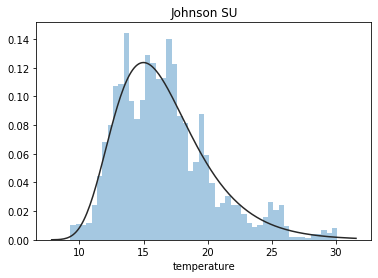

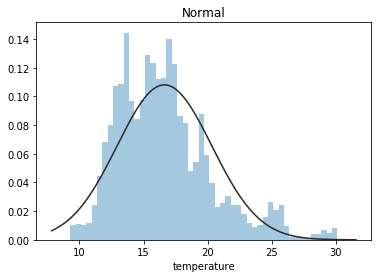

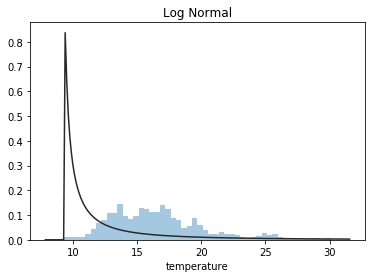

In [20]:
y = train['temperature']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm);

Skewness: 0.926085
Kurtosis: 0.933827


(time            0.042563
 year            0.000000
 month           2.722189
 day            -0.971769
 hour           -0.145425
 min            -0.004005
 sec            -0.009804
 outdoorTemp     0.980080
 outdoorHum     -0.790642
 outdoorAtmo   -17.654660
 indoorHum      -0.917261
 indoorAtmo    -12.681374
 temperature     0.926085
 dtype: float64,
 time            -1.200271
 year             0.000000
 month            5.410747
 day              0.590072
 hour            -1.165767
 min             -1.197135
 sec             -1.180270
 outdoorTemp      1.025864
 outdoorHum      -0.196982
 outdoorAtmo    441.793499
 indoorHum        0.123061
 indoorAtmo     163.189617
 temperature      0.933827
 dtype: float64)

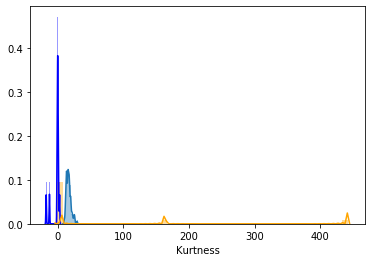

In [21]:
sns.distplot(train['temperature']);
print("Skewness: %f" % train['temperature'].skew())
print("Kurtosis: %f" % train['temperature'].kurt())
sns.distplot(train.skew(), color='blue', axlabel ='Skewness')
sns.distplot(train.kurt(), color='orange', axlabel ='Kurtness')
train.skew(), train.kurt()

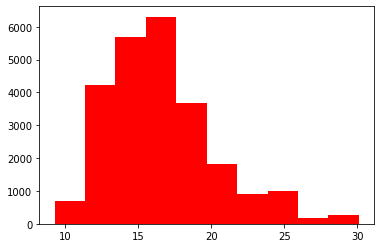

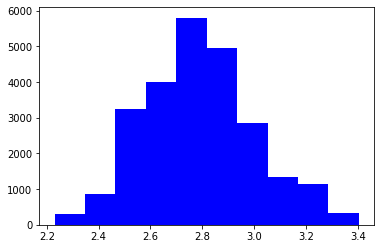

In [22]:
plt.hist(train['temperature'], orientation='vertical',histtype='bar', color='red')
plt.show()
plt.hist(np.log(train['temperature']), orientation='vertical',histtype='bar', color='blue')
plt.show()

In [23]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.columns

Index(['time', 'year', 'month', 'day', 'hour', 'min', 'sec', 'outdoorTemp',
       'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature'],
      dtype='object')

In [24]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index([], dtype='object')

In [25]:
numerical_features = ['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo']
categorical_features = ['time', 'year', 'month', 'day', 'hour', 'min', 'sec']

In [26]:
numerical_features.append('temperature')
print(numerical_features)

['outdoorTemp', 'outdoorHum', 'outdoorAtmo', 'indoorHum', 'indoorAtmo', 'temperature']


temperature    1.000000
outdoorTemp    0.992843
indoorAtmo    -0.114165
outdoorAtmo   -0.228166
outdoorHum    -0.917698
indoorHum     -0.923173
Name: temperature, dtype: float64 



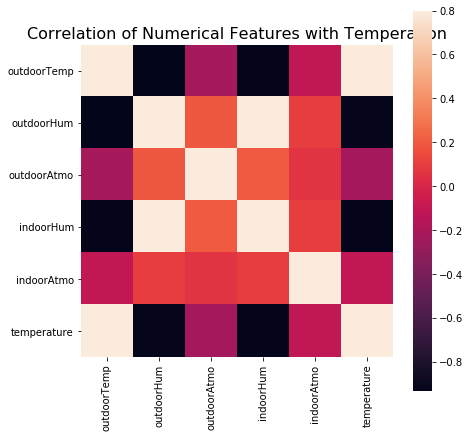

In [27]:
temperature_numerical = train[numerical_features]
correlation = temperature_numerical.corr()
print(correlation['temperature'].sort_values(ascending=False), '\n')
f, ax = plt.subplots(figsize=(7, 7))
plt.title('Correlation of Numerical Features with Temperation', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)
del temperature_numerical['temperature']

In [28]:
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ',
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )

outdoorTemp     Skewness: 00.98     Kurtosis: 001.03
outdoorHum      Skewness: -0.79     Kurtosis: -00.20
outdoorAtmo     Skewness: -17.65     Kurtosis: 441.79
indoorHum       Skewness: -0.92     Kurtosis: 000.12
indoorAtmo      Skewness: -12.68     Kurtosis: 163.19
temperature     Skewness: 00.93     Kurtosis: 000.93


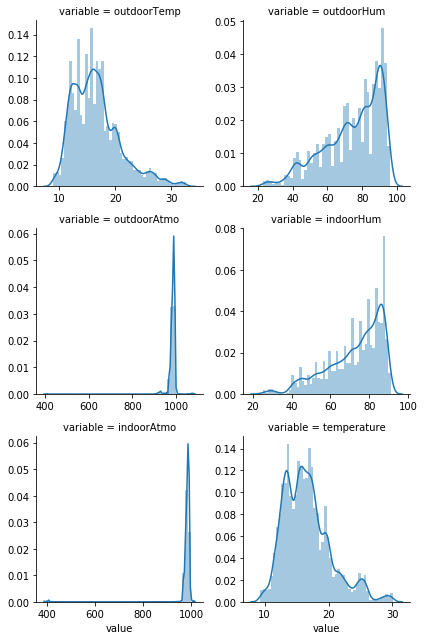

In [29]:
f = pd.melt(train, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [30]:
numerical_features

['outdoorTemp',
 'outdoorHum',
 'outdoorAtmo',
 'indoorHum',
 'indoorAtmo',
 'temperature']

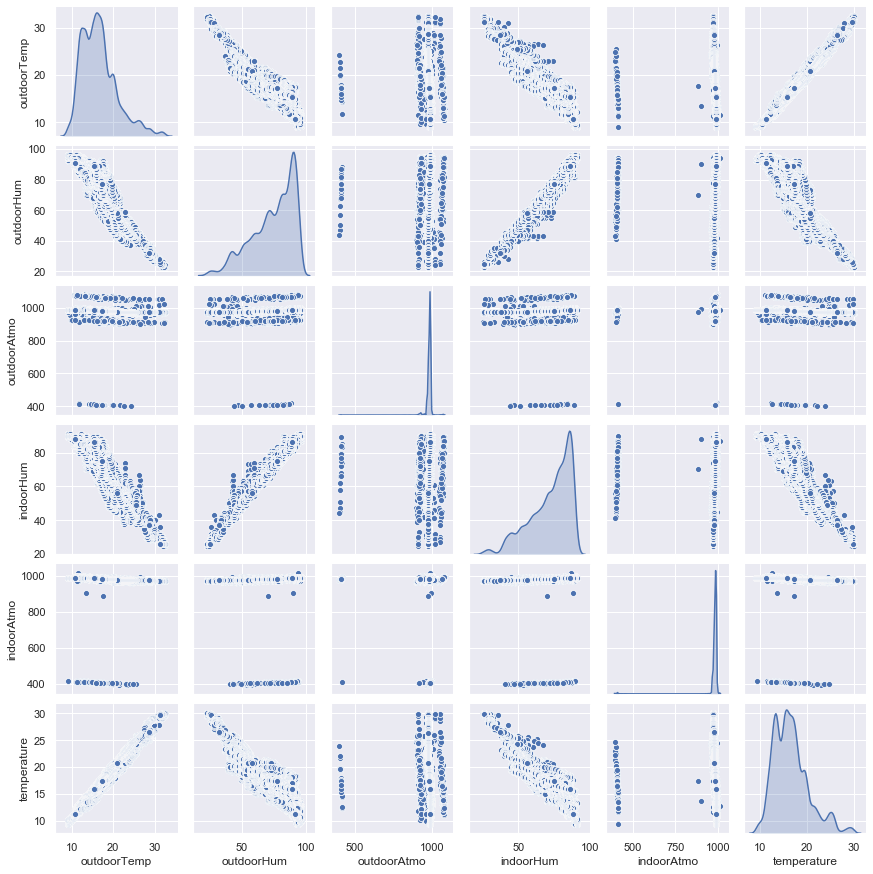

In [31]:
sns.set()
columns = numerical_features
sns.pairplot(train[columns], height=2 ,kind='scatter', diag_kind='kde')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


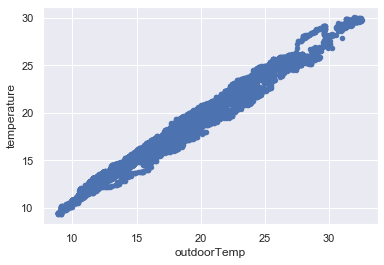

In [32]:
train.plot.scatter(x='outdoorTemp', y='temperature')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


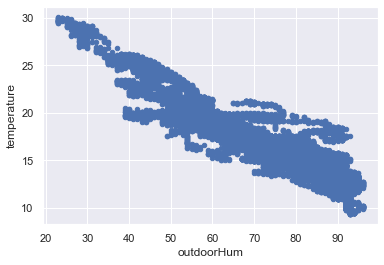

In [33]:
train.plot.scatter(x='outdoorHum', y='temperature')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


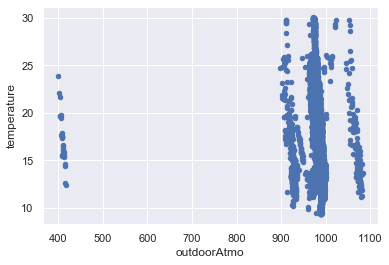

In [34]:
train.plot.scatter(x='outdoorAtmo', y='temperature')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


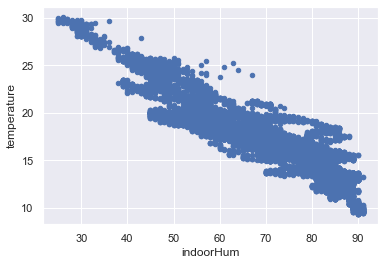

In [35]:
train.plot.scatter(x='indoorHum', y='temperature')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


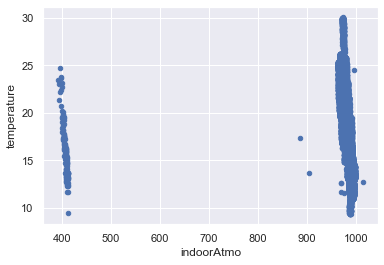

In [36]:
train.plot.scatter(x='indoorAtmo', y='temperature')

In [37]:
indoorAtmo_500 = train[train['indoorAtmo'] < 500]

In [38]:
indoorAtmo_500['day'].unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31,  1,  2], dtype=int64)

## 室内气压
分布一致

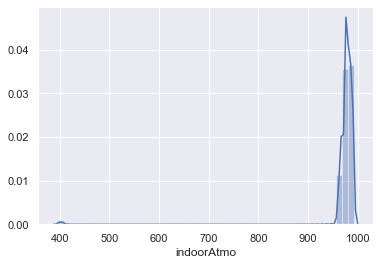

In [39]:
sns.distplot(test['indoorAtmo'])

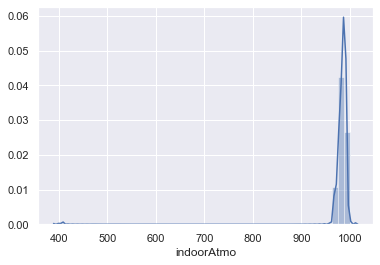

In [40]:
sns.distplot(train['indoorAtmo'])

## 室外气压
分布基本一致

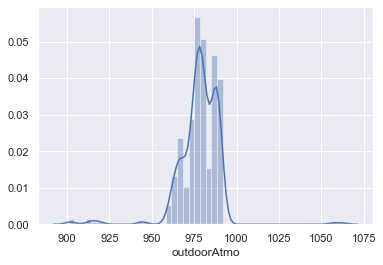

In [41]:
sns.distplot(test['outdoorAtmo'])

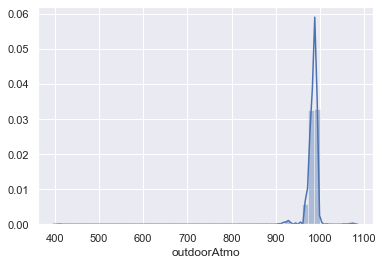

In [42]:
sns.distplot(train['outdoorAtmo'])

## 室外湿度
基本一致

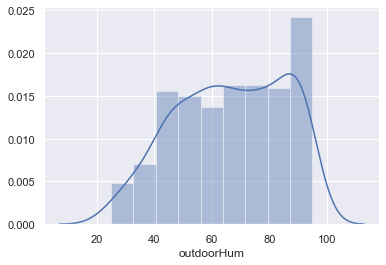

In [43]:
sns.distplot(test['outdoorHum'])

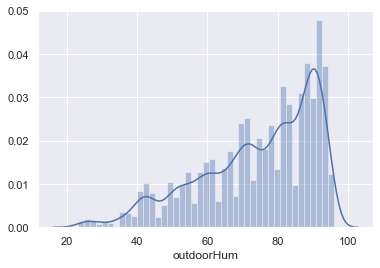

In [44]:
sns.distplot(train['outdoorHum'])

## 室外湿度

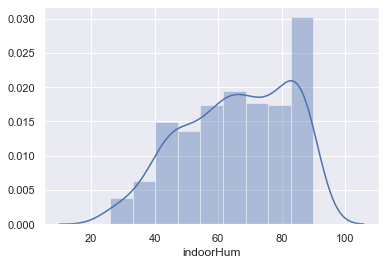

In [45]:
sns.distplot(test['indoorHum'])

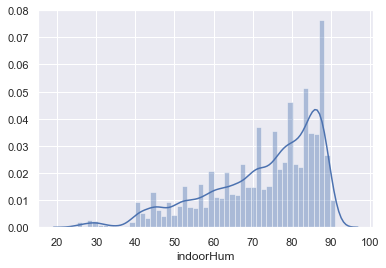

In [46]:
sns.distplot(train['indoorHum'])

## 室外温度

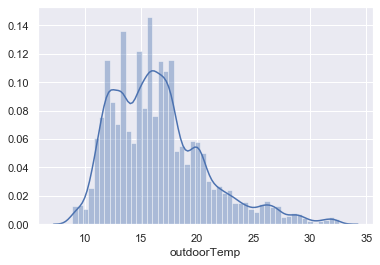

In [48]:
sns.distplot(train['outdoorTemp'])

## 室内温度

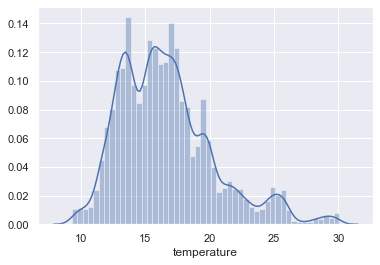

In [47]:
sns.distplot(train['temperature'])